<a href="https://colab.research.google.com/github/jaszmine/bernstein_vazirani/blob/main/bernstein_vazirani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install qiskit

# Importing standard Qiskit libraries
# from qiskit import QuantumCircuit, transpile
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
#from ibm_quantum_widgets import *

#from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading IBM Quantum account(s)
#service = QiskitRuntimeService(channel="ibm_quantum")

In [ ]:
'''
implementation of the Bernstein-Vazirani quantum algorithm
for n=4 qubits with the secret string 1011

example of a quantum algorithm that outperforms classical methods
we put secret string in a box (function)
determining what's inside the box
computer guesses secret number

classically,
- can apply AND operations by guessing n attempts
- or exponentially: for n-bit secretNum, tries from 0 to 2^n-1

using Bernstein-Vazirani's alg
- finds secretNum in 1 attempt (regardless of secretNum size)

reference: https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep6_Bernstein-Vazirani_Algorithm.ipynb
'''

"\n# implementation of the Bernstein-Vazirini quantum algorithm\n# for n=4 qubits with the secret string 1011\n\n# example of a quantum algorithm that outperforms classical methods\n# we put secret string in a box (function)\n# determining what's inside the box \n# computer guesses secret number \n\n# classically, comp will apply AND operations by guessing the num of bits tries\n"

In [ ]:
'''
Algorithm

1. initialize 1st n qubits in |0> state, & last qubit in |1> state
2. apply Hadamard gates to all qubits
3. build oracle (box containing secret number)
4. measure the 1st n qubits in the Bell basis (applying h gates before measurements)
'''

In [3]:
secretNum = '1011'

In [21]:
qc = QuantumCircuit(4+1, 4)

qc.h([0, 1, 2, 3])
qc.x(4)
qc.h(4)

# for every 1 in the secretNum, apply cx gate
qc.barrier()
qc.cx(3, 4)
qc.cx(1, 4)
qc.cx(0, 4)

# to see what the secretNum is, can read 1 when ther's a cx and 0 when not

qc.barrier()
qc.h([0, 1, 2, 3])

qc.barrier()
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

qc.draw()

┌───┐      ░                 ░ ┌───┐ ░ ┌─┐         
q_0: ┤ H ├──────░─────────────■───░─┤ H ├─░─┤M├─────────
     ├───┤      ░             │   ░ ├───┤ ░ └╥┘┌─┐      
q_1: ┤ H ├──────░────────■────┼───░─┤ H ├─░──╫─┤M├──────
     ├───┤      ░        │    │   ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├──────░────────┼────┼───░─┤ H ├─░──╫──╫─┤M├───
     ├───┤      ░        │    │   ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ┤ H ├──────░───■────┼────┼───░─┤ H ├─░──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░───────░──╫──╫──╫──╫─
     └───┘└───┘ ░ └───┘└───┘└───┘ ░       ░  ║  ║  ║  ║ 
c: 4/════════════════════════════════════════╩══╩══╩══╩═
                                             0  1  2  3

In [22]:
sim = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=sim, shots=1).result()
counts = result.get_counts()
print(counts)

{'1011': 1}


In [ ]:
# making code applicable to any secret number

In [6]:
secretNum = '10111100101'

In [7]:
# same num of classical bits as in secretNum
qc = QuantumCircuit(len(secretNum)+1, len(secretNum))

qc.h(range(len(secretNum)))
qc.x(len(secretNum))
qc.h(len(secretNum))

# for every 1 in the secretNum, apply cx gate
qc.barrier()

# reversed because circuit is built top to bottom
# if string contains 1, then aply controlled x from index of qubit to last qubit
for ii, yesno in enumerate(reversed(secretNum)):
    if yesno == '1':
        qc.cx(ii, len(secretNum))


# to see what the secretNum is, can read 1 when there's a cx and 0 when not

qc.barrier()
qc.h(range(len(secretNum)))

qc.barrier()
qc.measure(range(len(secretNum)), range(len(secretNum)))

qc.draw()

┌───┐      ░                                     ░ ┌───┐ ░ ┌─┐         »
 q_0: ┤ H ├──────░───■─────────────────────────────────░─┤ H ├─░─┤M├─────────»
      ├───┤      ░   │                                 ░ ├───┤ ░ └╥┘┌─┐      »
 q_1: ┤ H ├──────░───┼─────────────────────────────────░─┤ H ├─░──╫─┤M├──────»
      ├───┤      ░   │                                 ░ ├───┤ ░  ║ └╥┘┌─┐   »
 q_2: ┤ H ├──────░───┼────■────────────────────────────░─┤ H ├─░──╫──╫─┤M├───»
      ├───┤      ░   │    │                            ░ ├───┤ ░  ║  ║ └╥┘┌─┐»
 q_3: ┤ H ├──────░───┼────┼────────────────────────────░─┤ H ├─░──╫──╫──╫─┤M├»
      ├───┤      ░   │    │                            ░ ├───┤ ░  ║  ║  ║ └╥┘»
 q_4: ┤ H ├──────░───┼────┼────────────────────────────░─┤ H ├─░──╫──╫──╫──╫─»
      ├───┤      ░   │    │                            ░ ├───┤ ░  ║  ║  ║  ║ »
 q_5: ┤ H ├──────░───┼────┼────■───────────────────────░─┤ H ├─░──╫──╫──╫──╫─»
      ├───┤      ░   │    │    │                       ░ ├───┤ ░  ║  ║  ║  ║ »
 q_6: ┤ H ├──────░───┼────┼────┼────■──────────────────░─┤ H ├─░──╫──╫──╫──╫─»
      ├───┤      ░   │    │    │    │                  ░ ├───┤ ░  ║  ║  ║  ║ »
 q_7: ┤ H ├──────░───┼────┼────┼────┼────■─────────────░─┤ H ├─░──╫──╫──╫──╫─»
      ├───┤      ░   │    │    │    │    │             ░ ├───┤ ░  ║  ║  ║  ║ »
 q_8: ┤ H ├──────░───┼────┼────┼────┼────┼────■────────░─┤ H ├─░──╫──╫──╫──╫─»
      ├───┤      ░   │    │    │    │    │    │        ░ ├───┤ ░  ║  ║  ║  ║ »
 q_9: ┤ H ├──────░───┼────┼────┼────┼────┼────┼────────░─┤ H ├─░──╫──╫──╫──╫─»
      ├───┤      ░   │    │    │    │    │    │        ░ ├───┤ ░  ║  ║  ║  ║ »
q_10: ┤ H ├──────░───┼────┼────┼────┼────┼────┼────■───░─┤ H ├─░──╫──╫──╫──╫─»
      ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ░  ║  ║  ║  ║ »
q_11: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├─░───────░──╫──╫──╫──╫─»
      └───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░       ░  ║  ║  ║  ║ »
c: 11/════════════════════════════════════════════════════════════╩══╩══╩══╩═»
                                                                  0  1  2  3 »
«                           
« q_0: ─────────────────────
«                           
« q_1: ─────────────────────
«                           
« q_2: ─────────────────────
«                           
« q_3: ─────────────────────
«      ┌─┐                  
« q_4: ┤M├──────────────────
«      └╥┘┌─┐               
« q_5: ─╫─┤M├───────────────
«       ║ └╥┘┌─┐            
« q_6: ─╫──╫─┤M├────────────
«       ║  ║ └╥┘┌─┐         
« q_7: ─╫──╫──╫─┤M├─────────
«       ║  ║  ║ └╥┘┌─┐      
« q_8: ─╫──╫──╫──╫─┤M├──────
«       ║  ║  ║  ║ └╥┘┌─┐   
« q_9: ─╫──╫──╫──╫──╫─┤M├───
«       ║  ║  ║  ║  ║ └╥┘┌─┐
«q_10: ─╫──╫──╫──╫──╫──╫─┤M├
«       ║  ║  ║  ║  ║  ║ └╥┘
«q_11: ─╫──╫──╫──╫──╫──╫──╫─
«       ║  ║  ║  ║  ║  ║  ║ 
«c: 11/═╩══╩══╩══╩══╩══╩══╩═
«       4  5  6  7  8  9  10

In [8]:
sim = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=sim, shots=1).result()
counts = result.get_counts()

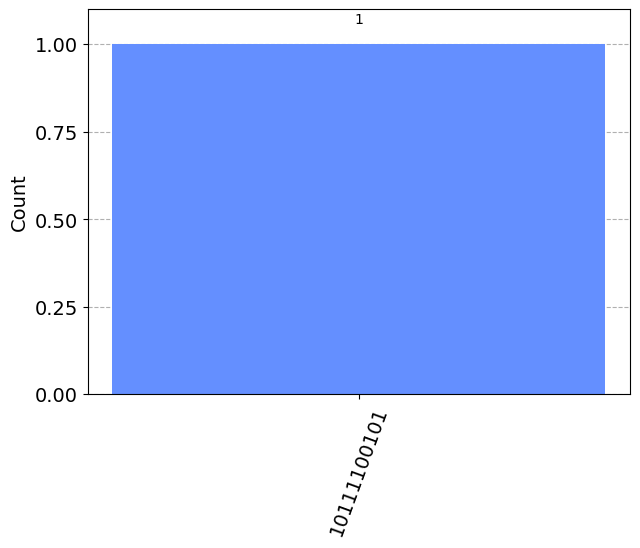

In [9]:
# displays how 100% of the results contain the secret number
plot_histogram(result.get_counts(qc))

In [10]:
# returns the secret number in number of rounds
print(counts)

{'10111100101': 1}
